<a href="https://colab.research.google.com/github/neurologic/MotorSystems_BIOL358_SP22/blob/main/BasisSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have talked a lot about "basis sets" this semester, and it seems like a concept that many are still struggling to build intuition for and visualize. This concept is particularly important for understanding what the cerebellum is doing for adaptive motor control (and whatever other adaptive control functions it is involved in). This notebook providees tools to examine how signals of a basis set can be combined in different proportions to produce a variety of output signals. 

In [30]:
#@markdown TASK: run this code cell to import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timezone,timedelta

import ipywidgets as widgets  # interactive display
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

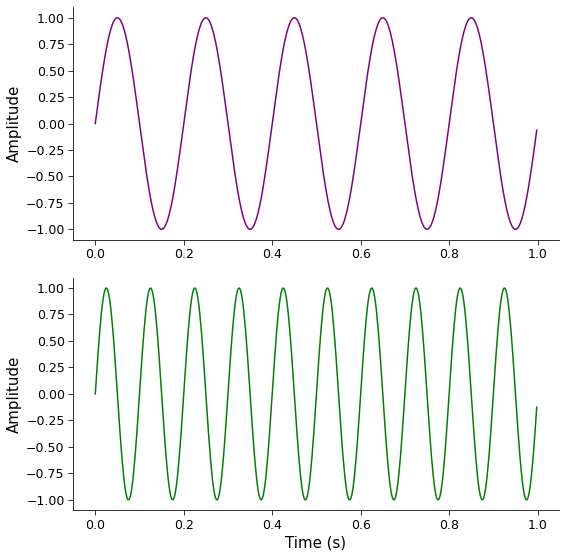

In [18]:
#@markdown TASK: set the frequency for two signals in your basis set
frequency1 = 5 #@param
frequency2 = 10 #@param

#@markdown TASK: Run this code cell to plot the two signals

# sampling rate
sr = 500.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# frequency of the signal
 
y1 = np.sin(2*np.pi*frequency1*t)
y2 = np.sin(2*np.pi*frequency2*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y1, 'purple')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(t, y2, 'green')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()


You can think about these two signals as parallel fiber inputs to a post-synaptic cell. The membrane potential response of the post-synaptic cell will change based on the synaptic weight from each input. The set of inputs to the postsynaptic cell is a "basis set" (a set of signals that can be combinned in different proportions to create many different signals).

$$
response = {baseline\ spike\ rate} + {(w_1 * y1)} + {(w_2 * y2)}
$$

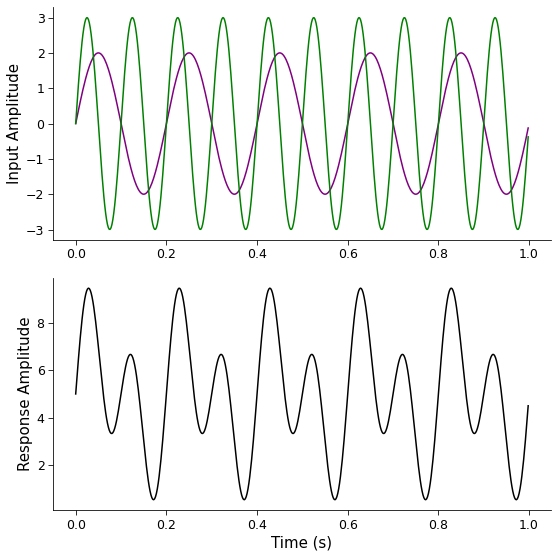

In [19]:
#@markdown TASK: set the synaptic weight for each input

w1 =  2#@param
w2 =  3#@param

#@markdown You can also change the baseline spike rate of the post-synaptic cell
baseline_rate = 5 #@param

#@markdown TASK: run this code cell to plot the response 
#@markdown of the purkinje cell to these inputs

response = baseline_rate + w1*y1 + w2*y2

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, w1*y1, 'purple')
plt.plot(t, w2*y2, 'green')
plt.ylabel('Input Amplitude')

plt.subplot(212)
plt.plot(t, response, 'k')
plt.ylabel('Response Amplitude')

plt.xlabel('Time (s)')
plt.show()

In [29]:
#@markdown TASK: run this code cell and then slide the widgets
#@markdown to set the synaptic weight on each of 5 different basis set signals
#@markdown > The plots of each input and the net response of the postsynaptic cell will update accordingly
my_layout.width = '450px'


@widgets.interact(
    w1=widgets.FloatSlider(0., min=0., max=10., step=1.,
                               layout=my_layout),
    w2=widgets.FloatSlider(0., min=0., max=10., step=1.,
                               layout=my_layout),
    w3=widgets.FloatSlider(0., min=0., max=10., step=1.,
                               layout=my_layout),
    w4=widgets.FloatSlider(0., min=0., max=10., step=1.,
                               layout=my_layout),  
    w5=widgets.FloatSlider(0., min=0., max=10., step=1.,
                               layout=my_layout),  
    baseline_rate=widgets.FloatSlider(0., min=0., max=10., step=1.,
                               layout=my_layout)
                  )

def basis_set_combine(w1,w2,w3,w4,w5,baseline_rate):
    
    y1 = np.sin(2*np.pi*2*t)
    y2 = np.sin(2*np.pi*4*t)
    y3 = np.sin(2*np.pi*6*t)
    y4 = np.sin(2*np.pi*8*t)
    y5 = np.sin(2*np.pi*10*t)

    response = baseline_rate + w1*y1 + w2*y2 + w3*y3 + w4*y4 + w5*y5

    plt.figure(figsize = (8, 8))
    plt.subplot(211)
    plt.plot(t, w1*y1, 'purple')
    plt.plot(t, w2*y2, 'green')
    plt.plot(t, w3*y3, 'orange')
    plt.plot(t, w4*y4, 'brown')
    plt.plot(t, w5*y5, 'blue')
    plt.ylabel('Input Amplitude')

    plt.subplot(212)
    plt.plot(t, response, 'k')
    plt.ylabel('Response Amplitude')

    plt.xlabel('Time (s)')
    plt.show() 
print('Interactive demo initiated at ' + str(datetime.now(timezone(-timedelta(hours=5)))))

interactive(children=(FloatSlider(value=0.0, description='w1', layout=Layout(width='450px'), max=10.0, step=1.…

Interactive demo initiated at 2022-04-21 08:17:56.677241-05:00
